In [ ]:
!mkdir -p  ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:12<00:00, 130MB/s]
100% 1.06G/1.06G [00:12<00:00, 88.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,MaxPooling2D,Dropout

In [ ]:
train_ds =keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
from keras.layers import BatchNormalization

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_5 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_6 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=25,validation_data=validation_ds)

Epoch 1/25
625/625 [==============================] - 66s 105ms/step - loss: 0.0249 - accuracy: 0.9926 - val_loss: 1.1635 - val_accuracy: 0.8290
Epoch 2/25
625/625 [==============================] - 66s 105ms/step - loss: 0.0258 - accuracy: 0.9914 - val_loss: 1.0797 - val_accuracy: 0.8236
Epoch 3/25
625/625 [==============================] - 66s 105ms/step - loss: 0.0267 - accuracy: 0.9918 - val_loss: 0.9193 - val_accuracy: 0.8214
Epoch 4/25
625/625 [==============================] - 68s 108ms/step - loss: 0.0187 - accuracy: 0.9945 - val_loss: 2.3389 - val_accuracy: 0.7134
Epoch 5/25
625/625 [==============================] - 68s 108ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 1.4813 - val_accuracy: 0.8034
Epoch 6/25
625/625 [==============================] - 68s 108ms/step - loss: 0.0211 - accuracy: 0.9933 - val_loss: 1.0306 - val_accuracy: 0.7990
Epoch 7/25
625/625 [==============================] - 65s 103ms/step - loss: 0.0176 - accuracy: 0.9943 - val_loss: 1.1103 - val_ac

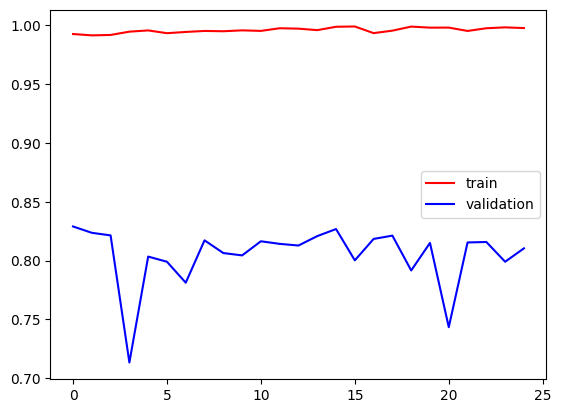

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

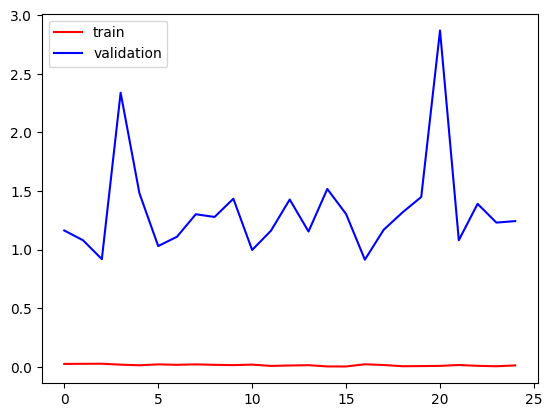

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_image = cv2.imread('/content/cat.jpg')

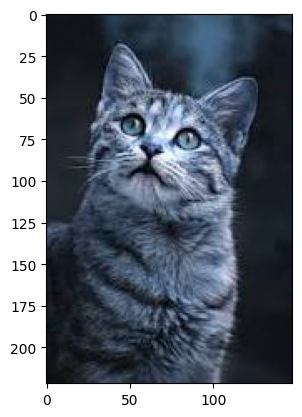

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(222, 148, 3)

In [ ]:
test_image = cv2.resize(test_image,(256,256))

In [ ]:
test_input = test_image.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 30ms/step


array([[0.]], dtype=float32)

In [ ]:
test2_image = cv2.imread('/content/dog.jpg')

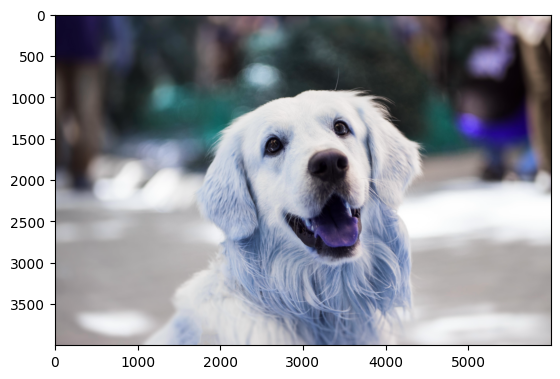

In [ ]:
plt.imshow(test2_image)

In [ ]:
test2_image.shape

(256, 256, 3)

In [ ]:
test2_image = cv2.resize(test2_image,(256,256))

In [ ]:
test2_input = test2_image.reshape(1,256,256,3)

In [ ]:
model.predict(test2_input)

1/1 [==============================] - 0s 28ms/step


array([[1.]], dtype=float32)